# Set up notebook

In [54]:
import numpy as np
import pandas as pd
from collections import Counter
import flask
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, decomposition
from sklearn import metrics, model_selection
import xgboost
import pickle

In [2]:
plt.style.use("fivethirtyeight")

In [3]:
plt.rcParams["figure.figsize"]=[5.0, 3.0]

In [33]:
pd.set_option("max_colwidth",0)

# Load data

In [34]:
with open("../data/airbnb_session_data.txt", "r") as f:
    data = [i.strip().split("|") for i in f.readlines()]

In [35]:
df = pd.DataFrame(data[1:], columns=data[0])

In [36]:
df.head()

,id_visitor,id_session,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,...,next_id_session,next_dim_session_number,next_dim_user_agent,next_dim_device_app_combo,next_ds,next_ts_min,next_ts_max,next_did_search,next_sent_message,next_sent_booking_request
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,...,b812bf56bf89b0b31f4e5b50d0c15ff8,84,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36",Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36",Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,...,456083b5f5506ad125d595006819de1d,85,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36",Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0,0,0
2,ed1329a6-064d-47e9-93bc-93f5a50822df,ee4e2f99dd0c0bef2d40e4bdf880c862,85,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36",Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0,0,...,94d30e9f3c8f92ae691e49d77a884777,86,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36",Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0,0,0
3,ed1329a6-064d-47e9-93bc-93f5a50822df,59fbde7b5d35403116c461fa7fc1ab6e,86,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36",Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0,0,...,ab02139dc81bea4b126cf5043faf53d9,87,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36",Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0,0,0
4,ed1329a6-064d-47e9-93bc-93f5a50822df,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36",Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0,0,...,6a69db1a5876e9798947f20e2c52bcc8,88,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.89 Safari/537.36",Desktop - Chrome,2015-02-19,2015-02-19 22:21:58,2015-02-19 22:22:02,0,0,0


In [47]:
data_dictionary = pd.read_csv("../data/data-dictionary.csv")
data_dictionary

,Column,Type,Null,Partition Key,Comment
0,id_visitor,varchar,True,False,id of the visitor
1,id_session,varchar,True,False,id of the session
2,dim_session_number,bigint,True,False,the number of session on a given day for a visitor
3,dim_user_agent,varchar,True,False,user agent of the session
4,dim_device_app_combo,varchar,True,False,parsed out device/app combo from user agent
5,ds,varchar,True,False,date stamp of session
6,ts_min,varchar,True,False,time of session start
7,ts_max,varchar,True,False,time of session end
8,did_search,bigint,True,False,binary flag indicating if the visitor performed a search during the session
9,sent_message,bigint,True,False,binary flag indicating if the visitor sent a message during the session


# Exploration

In [10]:
df.shape

(7756, 21)

In [11]:
df.columns

Index([u'id_visitor', u'id_session', u'dim_session_number', u'dim_user_agent',
       u'dim_device_app_combo', u'ds', u'ts_min', u'ts_max', u'did_search',
       u'sent_message', u'sent_booking_request', u'next_id_session',
       u'next_dim_session_number', u'next_dim_user_agent',
       u'next_dim_device_app_combo', u'next_ds', u'next_ts_min',
       u'next_ts_max', u'next_did_search', u'next_sent_message',
       u'next_sent_booking_request'],
      dtype='object')

In [12]:
unique_items = []
for i in df.columns:
    unique_items.append([i, df[i].nunique()])
unique_items = pd.DataFrame(unique_items, 
                            columns=["column", "num_unique"])

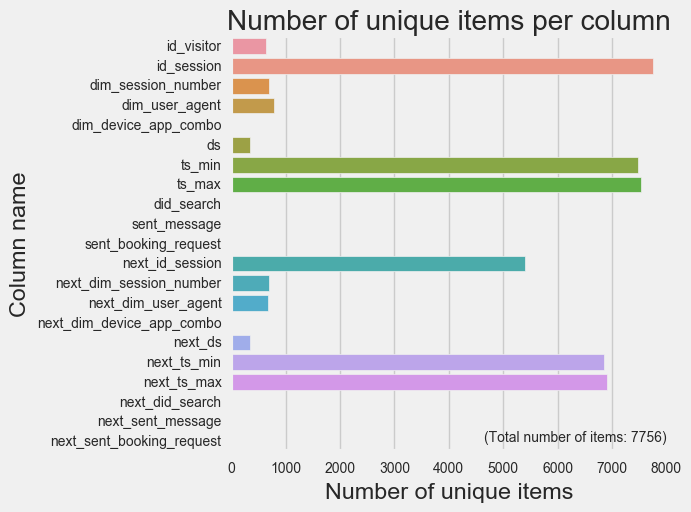

In [13]:
plt.subplots(figsize=(5,5));
sns.barplot(y="column", x="num_unique", data=unique_items, 
            orient="h");
plt.text(8000,20, "(Total number of items: {})".format(df.shape[0]), 
         fontsize=10, ha="right")
plt.title("Number of unique items per column");
plt.xlabel("Number of unique items");
plt.ylabel("Column name");
plt.show();

## user_agent

In [124]:
user_agent = df[["dim_user_agent", "next_dim_user_agent"]].copy()

In [125]:
user_agent["iphone"] = user_agent["dim_user_agent"].map(lambda x: 1 if "iphone" in x.lower() else 0)

In [126]:
user_agent["ipad"] = user_agent["dim_user_agent"].map(lambda x: 1 if "ipad" in x.lower() else 0)

In [127]:
user_agent["android"] = user_agent["dim_user_agent"].map(lambda x: 1 if "android" in x.lower() else 0)

In [128]:
user_agent["windows"] = user_agent["dim_user_agent"].map(lambda x: 1 if "windows" in x.lower() else 0)

In [129]:
user_agent["mac_os"] = user_agent["dim_user_agent"].map(lambda x: 1 if "mac os" in x.lower() else 0)

In [139]:
user_agent["other"] = user_agent[["iphone", "ipad", "android", 
                                  "windows", "mac_os"]].apply(lambda x: 0 if sum(x) > 0 else 1, axis=1)

In [131]:
user_agent["next_iphone"] = user_agent["next_dim_user_agent"].map(lambda x: 1 if "iphone" in x.lower() else 0)

In [132]:
user_agent["next_ipad"] = user_agent["next_dim_user_agent"].map(lambda x: 1 if "ipad" in x.lower() else 0)

In [133]:
user_agent["next_android"] = user_agent["next_dim_user_agent"].map(lambda x: 1 if "android" in x.lower() else 0)

In [134]:
user_agent["next_windows"] = user_agent["next_dim_user_agent"].map(lambda x: 1 if "windows" in x.lower() else 0)

In [135]:
user_agent["next_mac_os"] = user_agent["next_dim_user_agent"].map(lambda x: 1 if "mac os" in x.lower() else 0)

In [140]:
user_agent["next_other"] = user_agent[["next_iphone", "next_ipad", "next_android", 
                                       "next_windows", "next_mac_os"]].apply(lambda x: 0 if sum(x) > 0 else 1, axis=1)

In [141]:
user_agent.head()

,dim_user_agent,next_dim_user_agent,iphone,ipad,android,windows,mac_os,other,next_iphone,next_ipad,next_android,next_windows,next_mac_os,next_other
0,Airbnb/6.0 iPhone/8.1.2,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36",1,0,0,0,0,0,0,0,0,1,0,0
1,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36","Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36",0,0,0,1,0,0,0,0,0,1,0,0
2,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36","Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36",0,0,0,1,0,0,0,0,0,1,0,0
3,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36","Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36",0,0,0,1,0,0,0,0,0,1,0,0
4,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36","Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.89 Safari/537.36",0,0,0,1,0,0,0,0,0,1,0,0


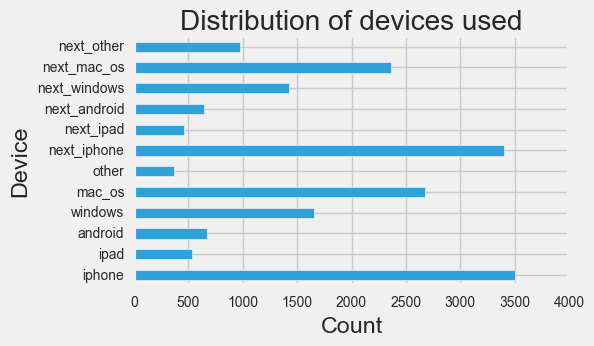

In [142]:
user_agent.iloc[:,2:].sum().plot(kind="barh");
plt.title("Distribution of devices used");
plt.ylabel("Device");
plt.xlabel("Count");
plt.show();